# Sentimen Analysis of Russia-Ukraine War

# 1. Crawling Data

In [175]:
import tweepy
import os
import pandas as pd

In [176]:
consumer_key = "X2YjWfUQYCDHwNYilnWeLBFrx" 
consumer_secret = "qjy8qJ9Tfaf9vRxZHh0GNiemwf15USCn4naARn6tXszMvD14Lv" 
access_token = "1147844322-dwcKtxvHhLy1ELJ3QCXPNYWOIDril7bHGuyzd5j"
access_token_secret = "QfdyyuRmbX4tIy4wxbJgv8JDfD6PDpoXkRyqhHaMlmj5q"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [177]:
Query = "Rusia+Ukraina+Perang -filter:retweets"
Start_Date = "2022-02-20"
End_Date = "2022-03-16"

In [178]:
tweets = tweepy.Cursor(api.search_tweets,
              q=Query,
              lang="id",
              since= Start_Date,
              Until = End_Date).items(300)

In [179]:
User_locs = [[tweet.user.screen_name,tweet.user.description,tweet.user.location,tweet.text,tweet.favorite_count,tweet.retweet_count,]for tweet in tweets]

Value = pd.DataFrame(data = User_locs,columns = ['User Name','Description_user','Location','Tweet','Likes','Retweet'])

Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter: Until
Unexpected parameter: since
Unexpected parameter

In [180]:
Value

,User Name,Description_user,Location,Tweet,Likes,Retweet
0,cnbcindonesia,Terus ikuti berita ekonomi bisnis dan analisis mendalam hanya di CNBC Indonesia .\nFacebook & Instagram : CNBC Indonesia\n.\nBeyond Business,Jakarta Capital Region,Sri Mulyani Buka-bukaan Efek Ekstrem Perang Rusia Vs Ukraina https://t.co/r2vmr1Lqnm,0,0
1,ByPawang,DATUK HADY ( https://t.co/725EK4mOUS ),,"Saudaraku yg dimuliakan Allah,perang merupakan bencana bagi manusia,tapi perang adalah sebuah solusi untuk menegakk… https://t.co/1hXuDpNI1q",0,0
2,Bisniscom,"Akun resmi https://t.co/v4FxOxsw5z. Berita, analisis serta navigasi bisnis dan investasi.\nIkuti juga @bisnisindo_id dan @hypeabisid","Jakarta, Indonesia","Perang Rusia Vs Ukraina: AS Beri Bantuan US$800 Juta untuk Ukraina, Biden-NATO Segera Bertemu https://t.co/2VAw43N2AS",0,0
3,maskat_saly,,,GHANIMA : RAMPASAN PERANG\n\nKementerian Pertahanan Rusia menerbitkan rekaman pengalihan senjata yang tertangkap dari… https://t.co/VLBLmLJkF3,0,0
4,kitittuda,,,@Bachtiar_D_ @TxtdariHI Kok kejauhan dah banyak kok video video agama yang bawa bawa perang rusia ukraina di up lag… https://t.co/N6F4dw7fr0,0,0
...,...,...,...,...,...,...
295,PatiBakomstra,Official Bakomstra DPC @PatiDemokrat\n-\n\n#DemokratBersamaRakyat\nMuda adalah Kekuatan,Jawa Tengah,Pernyataan Ketum AHY: Perang Rusia-Ukraina harus dihentikan karena sangat banyak kerugiannya… https://t.co/zjgLPe8X2o,0,0
296,MIEDborokokok,Enakan tidur,,"@CNNIndonesia tentara UKRAINA dan RUSIA perang gak pakek social distancing..gak pakek masker, masyarakatnya pada ng… https://t.co/ZWo5lNtNd5",0,0
297,republikaonline,Akun Resmi Republika Online Info Buku Republika? Cek @bukurepublika\n\n#DariRepublika,"Jakarta, Indonesia",Rusia dan Ukraina wakili lebih dari setengah pasokan minyak biji bunga matahari duni https://t.co/6Fmcav4TZx,1,0
298,WartaNusaId,Medianya Milenial Nusantara,Indonesia,"Perdana Menteri Polandia, Republik Ceko dan Slovenia mengunjungi ibu kota Ukraina.\n\nBeranikah Rusia membombardir Ki… https://t.co/mXyDLAveHW",2,0


In [181]:
Value['No']=Value.index
Value = Value.reset_index(drop=True)

In [182]:
Value.to_csv("Value.csv",index = True)

# 2. Preprocess Text Data

In [183]:
import pandas as pd
import nltk
import re
import emoji

**Getting Data**

In [184]:
pd.set_option('display.max_colwidth', 1200)

In [185]:
dataset = Value.drop(columns = ['No','User Name','Description_user','Location','Likes','Retweet'])
dataset.to_csv('Text_Practicum1.csv',index = False)

In [186]:
Dataset = pd.read_csv("Text_Practicum1.csv")
Dataset

,Tweet
0,Sri Mulyani Buka-bukaan Efek Ekstrem Perang Rusia Vs Ukraina https://t.co/r2vmr1Lqnm
1,"Saudaraku yg dimuliakan Allah,perang merupakan bencana bagi manusia,tapi perang adalah sebuah solusi untuk menegakk… https://t.co/1hXuDpNI1q"
2,"Perang Rusia Vs Ukraina: AS Beri Bantuan US$800 Juta untuk Ukraina, Biden-NATO Segera Bertemu https://t.co/2VAw43N2AS"
3,GHANIMA : RAMPASAN PERANG\n\nKementerian Pertahanan Rusia menerbitkan rekaman pengalihan senjata yang tertangkap dari… https://t.co/VLBLmLJkF3
4,@Bachtiar_D_ @TxtdariHI Kok kejauhan dah banyak kok video video agama yang bawa bawa perang rusia ukraina di up lag… https://t.co/N6F4dw7fr0
...,...
295,Pernyataan Ketum AHY: Perang Rusia-Ukraina harus dihentikan karena sangat banyak kerugiannya… https://t.co/zjgLPe8X2o
296,"@CNNIndonesia tentara UKRAINA dan RUSIA perang gak pakek social distancing..gak pakek masker, masyarakatnya pada ng… https://t.co/ZWo5lNtNd5"
297,Rusia dan Ukraina wakili lebih dari setengah pasokan minyak biji bunga matahari duni https://t.co/6Fmcav4TZx
298,"Perdana Menteri Polandia, Republik Ceko dan Slovenia mengunjungi ibu kota Ukraina.\n\nBeranikah Rusia membombardir Ki… https://t.co/mXyDLAveHW"


**Case Folding and Remove Unnecessary Character**

In [187]:
def preprocessing(tweets):
    tweets = tweets.encode('ascii','ignore').decode('utf-8')
    tweets = re.sub(r'[^\x00-\x7f]',r'',tweets)
    tweets = re.sub(r'[_(){}[]]+','',tweets)
    tweets = re.sub(r'@[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r'#[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r'_[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r'-[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r':[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r'https?:\/\/\S+','',tweets)
    tweets = re.sub(r'\d+','',tweets)
    tweets = re.sub(r'@+','',tweets)
    tweets = re.sub(r':+','',tweets)
    tweets = re.sub(r',+','',tweets)
    tweets = re.sub(r'_+','',tweets)
    tweets = tweets.lower()
    
    allemot = [str for str in tweets]
    listemot = [x for x in allemot if x in emoji.UNICODE_EMOJI]
    tweets = ' '.join([str for str in tweets.split()if not any (y in str for str in listemot)])
    return tweets

Dataset['Tweet'] = Dataset['Tweet'].apply(preprocessing)
Dataset

,Tweet
0,sri mulyani buka efek ekstrem perang rusia vs ukraina
1,saudaraku yg dimuliakan allahperang merupakan bencana bagi manusiatapi perang adalah sebuah solusi untuk menegakk
2,perang rusia vs ukraina as beri bantuan us$ juta untuk ukraina biden segera bertemu
3,ghanima rampasan perang kementerian pertahanan rusia menerbitkan rekaman pengalihan senjata yang tertangkap dari
4,kok kejauhan dah banyak kok video video agama yang bawa bawa perang rusia ukraina di up lag
...,...
295,pernyataan ketum ahy perang rusia harus dihentikan karena sangat banyak kerugiannya
296,tentara ukraina dan rusia perang gak pakek social distancing..gak pakek masker masyarakatnya pada ng
297,rusia dan ukraina wakili lebih dari setengah pasokan minyak biji bunga matahari duni
298,perdana menteri polandia republik ceko dan slovenia mengunjungi ibu kota ukraina. beranikah rusia membombardir ki


!pip3 install googletrans==3.1.0a0

In [188]:
import socket
socket.getaddrinfo('localhost', 8080)

[(<AddressFamily.AF_INET6: 23>, 0, 0, '', ('::1', 8080, 0, 0)),
 (<AddressFamily.AF_INET: 2>, 0, 0, '', ('127.0.0.1', 8080))]

In [189]:
import googletrans
from googletrans import *

translator = googletrans.Translator()

Dataset['Tweet'] = Dataset['Tweet'].astype(str) 
Dataset['Tweet'] = Dataset['Tweet'].apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',))
Dataset

,Tweet
0,Sri Mulyani opens the extreme effects of the Russia vs Ukraine war
1,"My brother, who is glorified by Allah, war is a disaster for humans but war is a solution to uphold"
2,war russia vs ukraine u.s. give US$ million aid to ukraine biden meet soon
3,ghanima spoils of war russian ministry of defense publishes footage of diversion of captured weapons from
4,how come there are so many religious videos that brought the Russia-Ukraine war up again
...,...
295,The announcement by the president that the Russian war must be stopped because it has caused so many losses
296,Ukrainian and Russian soldiers don't use social distancing... don't wear masks
297,Russia and Ukraine represent more than half of the world's sunflower seed oil supply
298,The Polish Prime Minister of the Czech Republic and Slovenia visited the capital city of Ukraine. dare russia bombard ki


In [190]:
Dataset.to_csv("Text_Translate1.csv",index= False)

**Remove Character**

In [191]:
Data = pd.read_csv('Text_Translate1.csv')
Data

,Tweet
0,Sri Mulyani opens the extreme effects of the Russia vs Ukraine war
1,"My brother, who is glorified by Allah, war is a disaster for humans but war is a solution to uphold"
2,war russia vs ukraine u.s. give US$ million aid to ukraine biden meet soon
3,ghanima spoils of war russian ministry of defense publishes footage of diversion of captured weapons from
4,how come there are so many religious videos that brought the Russia-Ukraine war up again
...,...
295,The announcement by the president that the Russian war must be stopped because it has caused so many losses
296,Ukrainian and Russian soldiers don't use social distancing... don't wear masks
297,Russia and Ukraine represent more than half of the world's sunflower seed oil supply
298,The Polish Prime Minister of the Czech Republic and Slovenia visited the capital city of Ukraine. dare russia bombard ki


In [192]:
def preprocessing(tweets):
   
    tweets = re.sub(r'[!”#$%&’()*+,-./:;<=>?@[\]^''{|}~]', '', tweets) 
    tweets = tweets.lower() 
    
    return tweets 

Data['Tweet'] = Data['Tweet'].apply(preprocessing)
Data

,Tweet
0,sri mulyani opens the extreme effects of the russia vs ukraine war
1,my brother who is glorified by allah war is a disaster for humans but war is a solution to uphold
2,war russia vs ukraine us give us million aid to ukraine biden meet soon
3,ghanima spoils of war russian ministry of defense publishes footage of diversion of captured weapons from
4,how come there are so many religious videos that brought the russiaukraine war up again
...,...
295,the announcement by the president that the russian war must be stopped because it has caused so many losses
296,ukrainian and russian soldiers don't use social distancing don't wear masks
297,russia and ukraine represent more than half of the world's sunflower seed oil supply
298,the polish prime minister of the czech republic and slovenia visited the capital city of ukraine dare russia bombard ki


**Stopword Removal**

In [ ]:
import socket
socket.getaddrinfo('localhost', 8080)

In [193]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [194]:
from nltk.corpus import stopwords
print (set(stopwords.words('english')))

{'ma', "mightn't", 'at', 'in', "should've", 'does', 'm', "hasn't", 'there', 'few', 'during', 'more', 'd', 'did', 're', "hadn't", 'shouldn', 'between', 'its', 'then', "don't", 'where', 'so', 'be', 'very', 'further', 'if', 'as', 'both', 'should', 'we', 'them', 'were', 'a', 'our', "wasn't", "isn't", 'y', 'until', 'can', 'again', 'hasn', 'you', 'for', 'herself', "shan't", 'on', 'why', "weren't", "you'd", "you're", 'your', 'o', 'wasn', 'ain', 'she', 'after', 'no', 'themselves', 'mustn', 'off', 'i', 'through', "haven't", 'has', 'wouldn', "she's", 'am', 'itself', 'all', 'most', 'is', 't', "that'll", 'while', 'needn', "won't", 'those', 'being', 'he', 'have', 'below', 'up', 'will', 'are', 'doesn', 'aren', 'not', 'under', 'weren', 'too', 'and', 'hers', 'these', 'from', 'any', 'same', 'with', 'do', "you've", 'him', "wouldn't", 'each', "shouldn't", 'haven', 'such', 'had', "doesn't", 'just', 'my', 'won', 'an', 'didn', 'because', 'what', 'isn', 'than', 'or', 've', 'shan', "it's", 'll', 'by', 'doing'

In [195]:
add = pd.DataFrame(Data['Tweet'])
Data['Tweet']= add.replace(to_replace =["it's"],  
                            value ="", regex= True) 
Data

,Tweet
0,sri mulyani opens the extreme effects of the russia vs ukraine war
1,my brother who is glorified by allah war is a disaster for humans but war is a solution to uphold
2,war russia vs ukraine us give us million aid to ukraine biden meet soon
3,ghanima spoils of war russian ministry of defense publishes footage of diversion of captured weapons from
4,how come there are so many religious videos that brought the russiaukraine war up again
...,...
295,the announcement by the president that the russian war must be stopped because it has caused so many losses
296,ukrainian and russian soldiers don't use social distancing don't wear masks
297,russia and ukraine represent more than half of the world's sunflower seed oil supply
298,the polish prime minister of the czech republic and slovenia visited the capital city of ukraine dare russia bombard ki


In [196]:
from nltk.corpus import stopwords

stopword = set(stopwords.words('english'))

mystoplist_result = []

for index,row in Data.iterrows():
    word_token = nltk.word_tokenize(row['Tweet'])
    word_token = [word for word in word_token if not word in stopword]
    mystoplist_result.append(" ".join(word_token))

Data['Tweet'] = mystoplist_result
Data

,Tweet
0,sri mulyani opens extreme effects russia vs ukraine war
1,brother glorified allah war disaster humans war solution uphold
2,war russia vs ukraine us give us million aid ukraine biden meet soon
3,ghanima spoils war russian ministry defense publishes footage diversion captured weapons
4,come many religious videos brought russiaukraine war
...,...
295,announcement president russian war must stopped caused many losses
296,ukrainian russian soldiers n't use social distancing n't wear masks
297,russia ukraine represent half world 's sunflower seed oil supply
298,polish prime minister czech republic slovenia visited capital city ukraine dare russia bombard ki


**Stemming**

In [197]:
from nltk.stem import PorterStemmer

Stem = nltk.PorterStemmer()

def porterstemmer(Tweets):
  text = ' '.join(Stem.stem(word) for word in Tweets.split() if word in Tweets)
  return Tweets
  
Data['Tweet']= Data['Tweet'].apply(porterstemmer)
Data

,Tweet
0,sri mulyani opens extreme effects russia vs ukraine war
1,brother glorified allah war disaster humans war solution uphold
2,war russia vs ukraine us give us million aid ukraine biden meet soon
3,ghanima spoils war russian ministry defense publishes footage diversion captured weapons
4,come many religious videos brought russiaukraine war
...,...
295,announcement president russian war must stopped caused many losses
296,ukrainian russian soldiers n't use social distancing n't wear masks
297,russia ukraine represent half world 's sunflower seed oil supply
298,polish prime minister czech republic slovenia visited capital city ukraine dare russia bombard ki


**Lemmatization**

In [198]:
from nltk.stem import WordNetLemmatizer

wn= nltk.WordNetLemmatizer()

def lemmatization(Tweets):
    text = ' '.join(wn.lemmatize(word) for word in Tweets.split() if word in Tweets)
    return Tweets


Data['Tweet'] = Data['Tweet'].apply(lemmatization)
Data

,Tweet
0,sri mulyani opens extreme effects russia vs ukraine war
1,brother glorified allah war disaster humans war solution uphold
2,war russia vs ukraine us give us million aid ukraine biden meet soon
3,ghanima spoils war russian ministry defense publishes footage diversion captured weapons
4,come many religious videos brought russiaukraine war
...,...
295,announcement president russian war must stopped caused many losses
296,ukrainian russian soldiers n't use social distancing n't wear masks
297,russia ukraine represent half world 's sunflower seed oil supply
298,polish prime minister czech republic slovenia visited capital city ukraine dare russia bombard ki


In [199]:
Data.to_csv('Final_Preprocess1.csv',index = False)

**3.Term Frequency Inverse Document Frequency**

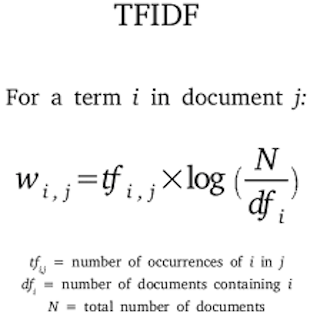

In [200]:
Data_set = pd.read_csv("Final_Preprocess1.csv")
Data_set

,Tweet
0,sri mulyani opens extreme effects russia vs ukraine war
1,brother glorified allah war disaster humans war solution uphold
2,war russia vs ukraine us give us million aid ukraine biden meet soon
3,ghanima spoils war russian ministry defense publishes footage diversion captured weapons
4,come many religious videos brought russiaukraine war
...,...
295,announcement president russian war must stopped caused many losses
296,ukrainian russian soldiers n't use social distancing n't wear masks
297,russia ukraine represent half world 's sunflower seed oil supply
298,polish prime minister czech republic slovenia visited capital city ukraine dare russia bombard ki


**Making Vector of Document**

In [201]:
from sklearn.feature_extraction.text import CountVectorizer

In [202]:
counter = CountVectorizer()

X = counter.fit_transform(Data_set['Tweet'])

vector = pd.DataFrame(X.toarray(), columns = counter.get_feature_names())

vector

,1500,abhigya,ability,able,abramovich,accept,accompanied,according,act,action,...,year,years,yes,yesterday,yet,yi,young,yuro,zelensky,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Creating TF-IDF**

In [203]:
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = TfidfTransformer()

Y = vectorizer.fit_transform(X)

df_tfidf = pd.DataFrame(Y.toarray(), columns = counter.get_feature_names())

df_tfidf

,1500,abhigya,ability,able,abramovich,accept,accompanied,according,act,action,...,year,years,yes,yesterday,yet,yi,young,yuro,zelensky,zone
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
df_tfidf.to_csv("TF_IDF1.csv",index = False)

# 3. Sentiment Using Textblob

!pip install TextBlob

In [205]:
Data_sentimen = pd.read_csv('Text_Translate1.csv')
Data_sentimen

,Tweet
0,Sri Mulyani opens the extreme effects of the Russia vs Ukraine war
1,"My brother, who is glorified by Allah, war is a disaster for humans but war is a solution to uphold"
2,war russia vs ukraine u.s. give US$ million aid to ukraine biden meet soon
3,ghanima spoils of war russian ministry of defense publishes footage of diversion of captured weapons from
4,how come there are so many religious videos that brought the Russia-Ukraine war up again
...,...
295,The announcement by the president that the Russian war must be stopped because it has caused so many losses
296,Ukrainian and Russian soldiers don't use social distancing... don't wear masks
297,Russia and Ukraine represent more than half of the world's sunflower seed oil supply
298,The Polish Prime Minister of the Czech Republic and Slovenia visited the capital city of Ukraine. dare russia bombard ki


**Text Blob**

In [206]:
from textblob import TextBlob

Data_sentimen['polarity'] = Data_sentimen['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
Data_sentimen['subjectivity'] = Data_sentimen['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

Data_sentimen

,Tweet,polarity,subjectivity
0,Sri Mulyani opens the extreme effects of the Russia vs Ukraine war,-0.125000,1.000000
1,"My brother, who is glorified by Allah, war is a disaster for humans but war is a solution to uphold",0.000000,0.000000
2,war russia vs ukraine u.s. give US$ million aid to ukraine biden meet soon,0.000000,0.000000
3,ghanima spoils of war russian ministry of defense publishes footage of diversion of captured weapons from,0.000000,0.000000
4,how come there are so many religious videos that brought the Russia-Ukraine war up again,0.250000,0.375000
...,...,...,...
295,The announcement by the president that the Russian war must be stopped because it has caused so many losses,0.250000,0.250000
296,Ukrainian and Russian soldiers don't use social distancing... don't wear masks,0.016667,0.033333
297,Russia and Ukraine represent more than half of the world's sunflower seed oil supply,0.166667,0.333333
298,The Polish Prime Minister of the Czech Republic and Slovenia visited the capital city of Ukraine. dare russia bombard ki,0.000000,0.000000


**Opini and fact labeling**

In [207]:
Data_sentimen.loc[Data_sentimen['subjectivity']>= 0.5, 'Jenis'] = "Opini"
Data_sentimen.loc[Data_sentimen['subjectivity']<=0.5, 'Jenis'] = "Fakta"

datasentiment = pd.DataFrame(Data_sentimen['Jenis'])
hasil_positif = datasentiment [datasentiment ['Jenis'] =="Opini"]
hasil_netral = datasentiment [datasentiment ['Jenis'] =="Fakta"]

hasil_positif = len (hasil_positif)
hasil_netral = len (hasil_netral)
df = pd.DataFrame({"Jenis": ['Opini','Fakta'],"Total Jenis": [hasil_positif,hasil_netral]})
df

,Jenis,Total Jenis
0,Opini,47
1,Fakta,253


**Separation of Opion netral and fact Tweets**

In [208]:
Data_sentimen.drop(Data_sentimen.loc[Data_sentimen['subjectivity']<=0.5].index, inplace=True)
Data_sentimen.drop(Data_sentimen.loc[Data_sentimen['polarity']==0.0].index, inplace=True)
Data_sentimen

,Tweet,polarity,subjectivity,Jenis
0,Sri Mulyani opens the extreme effects of the Russia vs Ukraine war,-0.125000,1.000000,Opini
5,The special work unit for implementing upstream oil and gas business activities (SKK Oil and Gas) stated that the price of oil and gas will,0.357143,0.571429,Opini
18,war russia vs ukraine day ke zelensky confident to win russia attack civilians,0.650000,0.616667,Opini
41,Ukraine Russia war cooking oil price goes up Doni Salmanan's assets are pulled by the strong earthquake and Mr President,0.433333,0.733333,Opini
44,"MJB everything is expensive, not just oil due to the Russia-Ukraine war",-0.312500,0.537500,Opini
57,up in arms! again the simpson predictions war russia vs ukraine come true here are other predictions...,0.112500,0.512500,Opini
60,"This is what people are talking about at Warkop, why is it so funny that Corona is said to have disappeared because of the Russia & Ukraine war",0.250000,1.000000,Opini
66,"idiot...people are talking about the Ukraine-Russia war.. idiots, how come you're talking about something else",-0.800000,0.800000,Opini
84,The war between Ukraine and Russia is scary. I'm going to your boarding house..,-0.500000,1.000000,Opini
91,The Ukraine-Russia war just started in February while cooking oil has gone up since June and has soared significantly,0.375000,0.875000,Opini


**Sentiment Labeling**

In [209]:

Data_sentimen.loc[Data_sentimen['polarity']> 0.0, 'sentiment'] = "Positif"
Data_sentimen.loc[Data_sentimen['polarity']< 0.0, 'sentiment'] = "Negatif"

Data_sentimen = Data_sentimen[['Tweet', 'polarity','sentiment','subjectivity','Jenis']]
Data_sentimen

,Tweet,polarity,sentiment,subjectivity,Jenis
0,Sri Mulyani opens the extreme effects of the Russia vs Ukraine war,-0.125000,Negatif,1.000000,Opini
5,The special work unit for implementing upstream oil and gas business activities (SKK Oil and Gas) stated that the price of oil and gas will,0.357143,Positif,0.571429,Opini
18,war russia vs ukraine day ke zelensky confident to win russia attack civilians,0.650000,Positif,0.616667,Opini
41,Ukraine Russia war cooking oil price goes up Doni Salmanan's assets are pulled by the strong earthquake and Mr President,0.433333,Positif,0.733333,Opini
44,"MJB everything is expensive, not just oil due to the Russia-Ukraine war",-0.312500,Negatif,0.537500,Opini
57,up in arms! again the simpson predictions war russia vs ukraine come true here are other predictions...,0.112500,Positif,0.512500,Opini
60,"This is what people are talking about at Warkop, why is it so funny that Corona is said to have disappeared because of the Russia & Ukraine war",0.250000,Positif,1.000000,Opini
66,"idiot...people are talking about the Ukraine-Russia war.. idiots, how come you're talking about something else",-0.800000,Negatif,0.800000,Opini
84,The war between Ukraine and Russia is scary. I'm going to your boarding house..,-0.500000,Negatif,1.000000,Opini
91,The Ukraine-Russia war just started in February while cooking oil has gone up since June and has soared significantly,0.375000,Positif,0.875000,Opini


In [210]:
hasil_positif = Data_sentimen[Data_sentimen['sentiment'] =="Positif"]
hasil_negatif = Data_sentimen[Data_sentimen['sentiment'] =="Negatif"]

hasil_positif = len (hasil_positif)
hasil_negatif = len (hasil_negatif)

per_hasil_positif = (hasil_positif/(hasil_positif+hasil_negatif))*100
per_hasil_negatif = (hasil_negatif/(hasil_positif+hasil_negatif))*100

df = pd.DataFrame({"Nilai": ['Positif','Negatif'],"Total Sentiment": [hasil_positif,hasil_negatif],"Persentase": [per_hasil_positif,per_hasil_negatif]})
df


,Nilai,Total Sentiment,Persentase
0,Positif,21,55.263158
1,Negatif,17,44.736842


In [211]:
Data_sentimen['No']=Data_sentimen.index
Data_sentimen = Data_sentimen.reset_index(drop=True)

<ipython-input-211-b4e12ad68996>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_sentimen['No']=Data_sentimen.index


In [212]:
Data_sentimen.to_csv("Data_sentimen1.csv",index = False )

**Profilling User from Sentimen**

In [213]:
Data_raw = pd.read_csv('Value.csv')
Data_sen = pd.read_csv('Data_sentimen1.csv')

In [214]:
Data_raw

,Unnamed: 0,User Name,Description_user,Location,Tweet,Likes,Retweet,No
0,0,cnbcindonesia,Terus ikuti berita ekonomi bisnis dan analisis mendalam hanya di CNBC Indonesia .\nFacebook & Instagram : CNBC Indonesia\n.\nBeyond Business,Jakarta Capital Region,Sri Mulyani Buka-bukaan Efek Ekstrem Perang Rusia Vs Ukraina https://t.co/r2vmr1Lqnm,0,0,0
1,1,ByPawang,DATUK HADY ( https://t.co/725EK4mOUS ),NaN,"Saudaraku yg dimuliakan Allah,perang merupakan bencana bagi manusia,tapi perang adalah sebuah solusi untuk menegakk… https://t.co/1hXuDpNI1q",0,0,1
2,2,Bisniscom,"Akun resmi https://t.co/v4FxOxsw5z. Berita, analisis serta navigasi bisnis dan investasi.\nIkuti juga @bisnisindo_id dan @hypeabisid","Jakarta, Indonesia","Perang Rusia Vs Ukraina: AS Beri Bantuan US$800 Juta untuk Ukraina, Biden-NATO Segera Bertemu https://t.co/2VAw43N2AS",0,0,2
3,3,maskat_saly,NaN,NaN,GHANIMA : RAMPASAN PERANG\n\nKementerian Pertahanan Rusia menerbitkan rekaman pengalihan senjata yang tertangkap dari… https://t.co/VLBLmLJkF3,0,0,3
4,4,kitittuda,NaN,NaN,@Bachtiar_D_ @TxtdariHI Kok kejauhan dah banyak kok video video agama yang bawa bawa perang rusia ukraina di up lag… https://t.co/N6F4dw7fr0,0,0,4
...,...,...,...,...,...,...,...,...
295,295,PatiBakomstra,Official Bakomstra DPC @PatiDemokrat\n-\n\n#DemokratBersamaRakyat\nMuda adalah Kekuatan,Jawa Tengah,Pernyataan Ketum AHY: Perang Rusia-Ukraina harus dihentikan karena sangat banyak kerugiannya… https://t.co/zjgLPe8X2o,0,0,295
296,296,MIEDborokokok,Enakan tidur,NaN,"@CNNIndonesia tentara UKRAINA dan RUSIA perang gak pakek social distancing..gak pakek masker, masyarakatnya pada ng… https://t.co/ZWo5lNtNd5",0,0,296
297,297,republikaonline,Akun Resmi Republika Online Info Buku Republika? Cek @bukurepublika\n\n#DariRepublika,"Jakarta, Indonesia",Rusia dan Ukraina wakili lebih dari setengah pasokan minyak biji bunga matahari duni https://t.co/6Fmcav4TZx,1,0,297
298,298,WartaNusaId,Medianya Milenial Nusantara,Indonesia,"Perdana Menteri Polandia, Republik Ceko dan Slovenia mengunjungi ibu kota Ukraina.\n\nBeranikah Rusia membombardir Ki… https://t.co/mXyDLAveHW",2,0,298


In [215]:
Data_sen

,Tweet,polarity,sentiment,subjectivity,Jenis,No
0,Sri Mulyani opens the extreme effects of the Russia vs Ukraine war,-0.125000,Negatif,1.000000,Opini,0
1,The special work unit for implementing upstream oil and gas business activities (SKK Oil and Gas) stated that the price of oil and gas will,0.357143,Positif,0.571429,Opini,5
2,war russia vs ukraine day ke zelensky confident to win russia attack civilians,0.650000,Positif,0.616667,Opini,18
3,Ukraine Russia war cooking oil price goes up Doni Salmanan's assets are pulled by the strong earthquake and Mr President,0.433333,Positif,0.733333,Opini,41
4,"MJB everything is expensive, not just oil due to the Russia-Ukraine war",-0.312500,Negatif,0.537500,Opini,44
5,up in arms! again the simpson predictions war russia vs ukraine come true here are other predictions...,0.112500,Positif,0.512500,Opini,57
6,"This is what people are talking about at Warkop, why is it so funny that Corona is said to have disappeared because of the Russia & Ukraine war",0.250000,Positif,1.000000,Opini,60
7,"idiot...people are talking about the Ukraine-Russia war.. idiots, how come you're talking about something else",-0.800000,Negatif,0.800000,Opini,66
8,The war between Ukraine and Russia is scary. I'm going to your boarding house..,-0.500000,Negatif,1.000000,Opini,84
9,The Ukraine-Russia war just started in February while cooking oil has gone up since June and has soared significantly,0.375000,Positif,0.875000,Opini,91


In [216]:
Join = pd.merge(Data_raw,Data_sen, on ='No', how ='inner')
Join

,Unnamed: 0,User Name,Description_user,Location,Tweet_x,Likes,Retweet,No,Tweet_y,polarity,sentiment,subjectivity,Jenis
0,0,cnbcindonesia,Terus ikuti berita ekonomi bisnis dan analisis mendalam hanya di CNBC Indonesia .\nFacebook & Instagram : CNBC Indonesia\n.\nBeyond Business,Jakarta Capital Region,Sri Mulyani Buka-bukaan Efek Ekstrem Perang Rusia Vs Ukraina https://t.co/r2vmr1Lqnm,0,0,0,Sri Mulyani opens the extreme effects of the Russia vs Ukraine war,-0.125000,Negatif,1.000000,Opini
1,5,mediaindonesia,Akun Twitter Resmi Media Indonesia | Jujur Bersuara | #EditorialMI,Jakarta - Indonesia,Satuan Kerja Khusus Pelaksana Kegiatan Usaha Hulu Minyak dan Gas Bumi (SKK Migas) menyebut harga minyak migas akan… https://t.co/BteEoFYpOA,0,0,5,The special work unit for implementing upstream oil and gas business activities (SKK Oil and Gas) stated that the price of oil and gas will,0.357143,Positif,0.571429,Opini
2,18,Bisniscom,"Akun resmi https://t.co/v4FxOxsw5z. Berita, analisis serta navigasi bisnis dan investasi.\nIkuti juga @bisnisindo_id dan @hypeabisid","Jakarta, Indonesia","Perang Rusia vs Ukraina Hari ke-21: Zelensky Pede Menang, Russia Serang Warga Sipil https://t.co/CAn1kkv2NC",1,0,18,war russia vs ukraine day ke zelensky confident to win russia attack civilians,0.650000,Positif,0.616667,Opini
3,41,rai_dhan,Your favorite announcer | Talking a lot on Jangan Dipaksa Podcast,Depok 🔛 Bandung,Ukraina rusia perang\nMinyak goreng harganya naik\nAset doni salmanan ditarik2in\nGempa kerasa terus\nDan pak presiden… https://t.co/UWmgRVAIm1,0,1,41,Ukraine Russia war cooking oil price goes up Doni Salmanan's assets are pulled by the strong earthquake and Mr President,0.433333,Positif,0.733333,Opini
4,44,graciaaa_15,99l :)\nbe yourself\nbe unique\nbe smart\nkinda selective\n#NCT #WAYV #TREASURE #TXT\nyg lainnya in private,"she/her, rant + FA",@yyoonbblue @O1ASA mjb semua lagi mahal ga cuma minyak akibat perang Rusia Ukraina,0,0,44,"MJB everything is expensive, not just oil due to the Russia-Ukraine war",-0.312500,Negatif,0.537500,Opini
5,57,NEunoia47,More News at here everyday,NaN,"HEBOH! Lagi² Ramalan The Simpson Perang Rusia vs Ukraina Jadi Kenyataan, Begini Prediksi Lainnya... https://t.co/MTyZ4YTf2b",0,0,57,up in arms! again the simpson predictions war russia vs ukraine come true here are other predictions...,0.112500,Positif,0.512500,Opini
6,60,indra_hutapea,My Life Is In Your Hands Dear Lord,"ÜT: -6.2452621,106.8687759","Ini obrolan orang2 di warkop napa lucu banget sih, korona katanya udah hilang gara2 perang rusia &amp; ukraina 😂",0,0,60,"This is what people are talking about at Warkop, why is it so funny that Corona is said to have disappeared because of the Russia & Ukraine war",0.250000,Positif,1.000000,Opini
7,66,RealSelf_TheOne,"orang cenderung tidak mengenal dirinya sendiri\nkeliru mengartikan apa yang mereka kumpulkan sebagai diri sendiri (self),apa yg km kumpulkan adalah milik km.","Jakarta Selatan, DKI Jakarta",@gerinisk2 @Yanti_9294 @DonAdam68 Idiot...orang lagi bahas perang ukraina rusia..org org idiot kek lu malah bahas yg lain 🤣,0,0,66,"idiot...people are talking about the Ukraine-Russia war.. idiots, how come you're talking about something else",-0.800000,Negatif,0.800000,Opini
8,84,bosbesaraldi,cuma mas mas biasa,"Kota Bandung, Jawa Barat",serem banget perang ukraina sama rusia. aku ke kosan kamu ya..,0,0,84,The war between Ukraine and Russia is scary. I'm going to your boarding house..,-0.500000,Negatif,1.000000,Opini
9,91,Sudiyanto204573,NaN,NaN,Perang Ukraine - Russia baru di 24 februari 2022 sedangkan minyak goreng udah Naik sejak juni 2021 dan melonjak tin… https://t.co/tp3TbLjIh0,0,0,91,The Ukraine-Russia war just started in February while cooking oil has gone up since June and has soared significantly,0.375000,Positif,0.875000,Opini


In [217]:
import numpy as np

In [218]:
Join.pivot_table(index='sentiment', 
                 values='Likes', 
                 aggfunc=np.sum, fill_value = 0)

,Likes
sentiment,
Negatif,31
Positif,60


In [219]:
Join.pivot_table(index='sentiment', 
                 values='Retweet', 
                 aggfunc=np.mean, fill_value = 0)

,Retweet
sentiment,
Negatif,0.529412
Positif,0.666667


In [220]:
Join1 = Join.copy()
Join2 = Join.copy()
Join3 = Join.copy()

In [221]:
Join_Negatif = Join1.loc[Join1['sentiment']=='Negatif']
Join_Negatif = Join_Negatif[['User Name']]
Join_Negatif

,User Name
0,cnbcindonesia
4,graciaaa_15
7,RealSelf_TheOne
8,bosbesaraldi
10,ordinarydokutah
11,aljufri_adenk
12,MondferL
17,ujang_awit
18,GATRA_com
21,Vendra_Deje


In [222]:
Join_Positif = Join2.loc[Join2['sentiment']=='Positif']
Join_Positif = Join_Positif[['User Name']]
Join_Positif

,User Name
1,mediaindonesia
2,Bisniscom
3,rai_dhan
5,NEunoia47
6,indra_hutapea
9,Sudiyanto204573
13,abdulmanan
14,bebasdotid
15,bungdedy
16,detikcom


# 4. Modeling using Machine Learning

**-Preparing Dataset-**

**Getting Data TF-IDF**

In [223]:
Tf_idf = pd.read_csv('TF_IDF1.csv')
Tf_idf

,1500,abhigya,ability,able,abramovich,accept,accompanied,according,act,action,...,year,years,yes,yesterday,yet,yi,young,yuro,zelensky,zone
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [224]:
Tf_idf['No']=Tf_idf.index
Tf_idf = Tf_idf.reset_index(drop=True)

In [225]:
Tf_idf

,1500,abhigya,ability,able,abramovich,accept,accompanied,according,act,action,...,years,yes,yesterday,yet,yi,young,yuro,zelensky,zone,No
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,295
296,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,296
297,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,297
298,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298


In [226]:
Tf_idf.to_csv('TF_IDF_FIX.csv',index = False )

**Getting Data label**

In [227]:
Label = pd.read_csv('Data_sentimen1.csv')
Label

,Tweet,polarity,sentiment,subjectivity,Jenis,No
0,Sri Mulyani opens the extreme effects of the Russia vs Ukraine war,-0.125000,Negatif,1.000000,Opini,0
1,The special work unit for implementing upstream oil and gas business activities (SKK Oil and Gas) stated that the price of oil and gas will,0.357143,Positif,0.571429,Opini,5
2,war russia vs ukraine day ke zelensky confident to win russia attack civilians,0.650000,Positif,0.616667,Opini,18
3,Ukraine Russia war cooking oil price goes up Doni Salmanan's assets are pulled by the strong earthquake and Mr President,0.433333,Positif,0.733333,Opini,41
4,"MJB everything is expensive, not just oil due to the Russia-Ukraine war",-0.312500,Negatif,0.537500,Opini,44
5,up in arms! again the simpson predictions war russia vs ukraine come true here are other predictions...,0.112500,Positif,0.512500,Opini,57
6,"This is what people are talking about at Warkop, why is it so funny that Corona is said to have disappeared because of the Russia & Ukraine war",0.250000,Positif,1.000000,Opini,60
7,"idiot...people are talking about the Ukraine-Russia war.. idiots, how come you're talking about something else",-0.800000,Negatif,0.800000,Opini,66
8,The war between Ukraine and Russia is scary. I'm going to your boarding house..,-0.500000,Negatif,1.000000,Opini,84
9,The Ukraine-Russia war just started in February while cooking oil has gone up since June and has soared significantly,0.375000,Positif,0.875000,Opini,91


In [228]:
Label.loc[Label['sentiment']=="Positif",'label_sen']="1"
Label.loc[Label['sentiment']=="Negatif",'label_sen']="-1"
label_num = pd.DataFrame(Label['label_sen'])
label_num

,label_sen
0,-1
1,1
2,1
3,1
4,-1
5,1
6,1
7,-1
8,-1
9,1


In [229]:
Full_data = Label.combine_first(label_num)
Full_data = Full_data[['No','Tweet', 'polarity','sentiment','subjectivity','Jenis','label_sen']]
Full_data = Full_data[['No','label_sen']]
Full_data

,No,label_sen
0,0,-1
1,5,1
2,18,1
3,41,1
4,44,-1
5,57,1
6,60,1
7,66,-1
8,84,-1
9,91,1


In [230]:
Full_data.to_csv('Full_data.csv',index= False )

**Combine & Drop The Data**

In [231]:
Combine_1 = pd.read_csv('TF_IDF_FIX.csv')
Combine_2 = pd.read_csv('Full_data.csv')

In [232]:
Combine_1

,1500,abhigya,ability,able,abramovich,accept,accompanied,according,act,action,...,years,yes,yesterday,yet,yi,young,yuro,zelensky,zone,No
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,295
296,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,296
297,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,297
298,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298


In [233]:
Combine_2

,No,label_sen
0,0,-1
1,5,1
2,18,1
3,41,1
4,44,-1
5,57,1
6,60,1
7,66,-1
8,84,-1
9,91,1


In [234]:
Final_Data = pd.merge(Combine_1,Combine_2, on ='No',how = 'inner')
Final_Data = Final_Data.drop(columns = ['No'])
Final_Data

,1500,abhigya,ability,able,abramovich,accept,accompanied,according,act,action,...,years,yes,yesterday,yet,yi,young,yuro,zelensky,zone,label_sen
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,-1
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,1
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.34245,0.0,1
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,1
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,-1
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,1
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,1
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,-1
8,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,-1
9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,1


In [235]:
Final_Data.to_csv('Final_Data11.csv',index = False)

**-Creating Dataset for Training & Testing Dataset-**

In [236]:
Dataset_mod = pd.read_csv('Final_Data11.csv')
Dataset_mod

,1500,abhigya,ability,able,abramovich,accept,accompanied,according,act,action,...,years,yes,yesterday,yet,yi,young,yuro,zelensky,zone,label_sen
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,-1
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,1
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.34245,0.0,1
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,1
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,-1
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,1
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,1
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,-1
8,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,-1
9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,1


**Undersampling Process**

In [237]:
X = Dataset_mod.drop(columns = ['label_sen'])
Y = Dataset_mod.drop(columns = X.columns)

In [238]:
from collections import Counter

Counter(Y.label_sen)

Counter({-1: 17, 1: 21})

In [239]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

Under= RandomUnderSampler(random_state=42, replacement=True)
x_under, y_under = Under.fit_resample(X, Y.label_sen)

print('original dataset shape:', Counter(Y.label_sen))
print('Resample dataset shape', Counter(y_under))

original dataset shape: Counter({1: 21, -1: 17})
Resample dataset shape Counter({-1: 17, 1: 17})


**Create Data Training & Testing**

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_under, y_under, test_size = 0.25, random_state = 45)

**Modeling**

In [241]:
from sklearn.svm import SVC

SVM_MOD = SVC()
SVM_MOD.fit (X_train, y_train.values.ravel())

predict = SVM_MOD.predict(X_train)
predict_test = SVM_MOD.predict(X_test)

In [242]:
from sklearn.metrics import classification_report
print('\nClassification Report Training\n')
print(classification_report(y_train, predict))


Classification Report Training

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [243]:
from sklearn.metrics import classification_report
print('\nClassification Report Training\n')
print(classification_report(y_test, predict_test))


Classification Report Training

              precision    recall  f1-score   support

          -1       0.86      1.00      0.92         6
           1       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9



**Handling Overfitting Using K-fold validation**

In [250]:
from sklearn.model_selection import cross_val_score

k_range = range (2,8)
k_score = []


for k in k_range :
    scores = cross_val_score(SVM_MOD,X,Y.values.ravel(),cv=k)
    k_score.append(scores.mean())
    k_fold = pd.DataFrame({"Numer_of_K" : range (2,k+1,1),"Mean of Accuracy": k_score})
    
k_fold = k_fold.max()
k_fold = k_fold.Numer_of_K
k_fold = k_fold.astype(int)
k_fold = k_fold-1
k_fold


6

**Optimization of SVM Model based on best K-fold)**

In [251]:
Parameter = {'C': [0.1,1, 10, 100], 
            'gamma': [1,0.1,0.01,0.001],
            'kernel': ['rbf', 'poly', 'sigmoid']}

In [252]:
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(SVM_MOD,
                         Parameter,
                         cv=k_fold,
                         scoring='accuracy')

In [253]:
model_svm.fit(X_train, y_train)

print(model_svm.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [254]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.5583333333333333


In [255]:
from sklearn.metrics import accuracy_score

y_pred= model_svm.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.3333333333333333
